## DATA IMPORT
To import data using `osiris_utils` you can use either the methods defined in `osiris_utils.data_readers` (this will be deprecated) or in `osiris_utils.data` (recommended). The methods in `osiris_utils.data` are object oriented and allow for more flexibility. They also contain the information about the data that is being read, that is obtained directly from the OSIRIS `.h5` grid file output.

In [1]:
import osiris_utils as ou
import numpy as np
import matplotlib.pyplot as plt

### Using `osiris_utils.data_readers`:
- `open1D` for 1D grid data
- `open2D` for 2D grid data

The returns are `numpy` arrays with the axis as `np.linspace` and data.

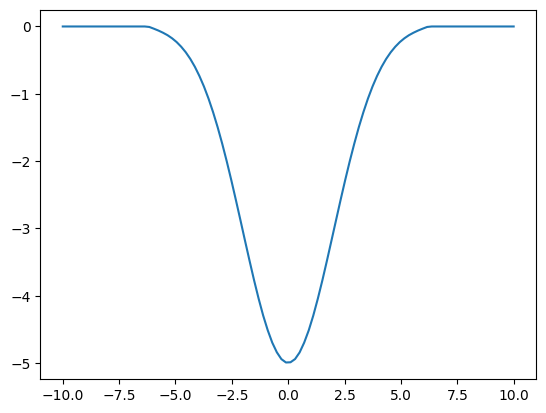

In [7]:
# 1D
x, data1D, _ = ou.open1D('files/x1-electrons-000001.h5')

plt.plot(x, data1D)

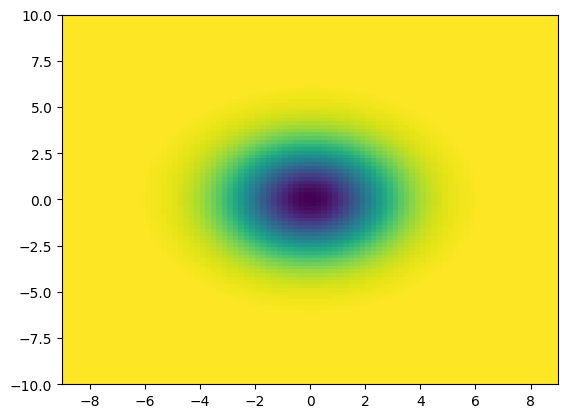

In [9]:
# 2D

x, y, data2D, _ = ou.open2D('files/x1x2-electrons-000001.h5')

plt.imshow(data2D, aspect='auto', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])

In [2]:
data = ou.OsirisGridFile('files/x1x2-electrons-000001.h5')

In [5]:
data.__dict__

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 90), dtype=float32),
 'grid': array([[ -9.,   9.],
        [-10.,  10.]]),
 'nx': (90, 100),
 'dx': array([0.2, 0.2]),
 'axis': [{'name': 'x2',
   'units': 'c / \\omega_p',
   'long_name': 'x_2',
   'type': 'linear'},
  {'name': 'x1',
   'units': 'c / \\omega_p',
   'long_name': 'x_1',
   'type': 'linear'}],
 'dt': 0.001,
 'dims_simulation': 2,
 'time': [0.001, '1 / \\omega_p'],
 'iter': 1,
 'name': 'electrons x_1x_2',
 'units': 'a.u.',
 'label': 'electrons x_1x_2',
 'type': 'grid'}

Text(0.5, 1.0, '$electrons x_1x_2$, t=0.001 $1 / \\omega_p$')

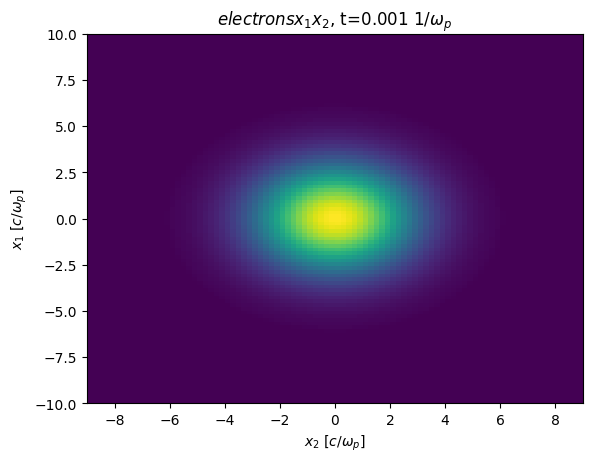

In [16]:
plt.figure()
plt.imshow(np.abs(-data.data), aspect='auto', origin='lower', extent=[data.grid[0][0], data.grid[0][-1], data.grid[1][0], data.grid[1][-1]])
plt.xlabel(rf"${data.axis[0]["long_name"]}$ [${data.axis[0]["units"]}$]")
plt.ylabel(rf"${data.axis[1]["long_name"]}$ [${data.axis[1]["units"]}$]")
plt.title(rf"${data.label}$, t={data.time[0]} ${data.time[1]}$")